<a href="https://colab.research.google.com/github/sapto-nugroho/PCD/blob/main/PCD_Assignment03/PCD_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama : Sapto Nugroho

##NIU : 565712

### Import

In [1]:
!ls
!git clone https://github.com/sapto-nugroho/PCD.git
!ls

sample_data
Cloning into 'PCD'...
remote: Enumerating objects: 589, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 589 (delta 80), reused 25 (delta 20), pack-reused 368 (from 3)
Receiving objects: 100% (589/589), 26.24 MiB | 10.98 MiB/s, done.
Resolving deltas: 100% (169/169), done.
PCD  sample_data


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, img_as_float
import cv2
import copy

### Input

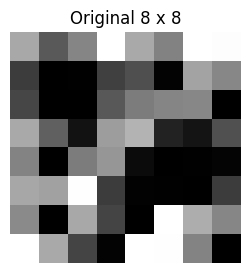

In [11]:
# img_path = '/content/PCD/PCD_Assignment03/images/woman01.jpg'
# img_path = '/content/PCD/PCD_Assignment03/images/script.png'
# img_path = '/content/PCD/PCD_Assignment03/images/grid.jpg'
# img_path = '/content/PCD/PCD_Assignment03/images/16x16.jpg'
img_path = '/content/PCD/PCD_Assignment03/images/8x8.jpg'
# img_path = '/content/PCD/PCD_Assignment03/images/4x4.jpg'
#
img0 = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img0 = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)
# img = img_as_float(img)

img = copy.deepcopy(img0)
# print(img.shape)
# print(img)

plt.figure(figsize=(10,3))
plt.imshow(img, cmap='gray')
plt.title(f"Original {img.shape[0]} x {img.shape[1]}")
plt.axis("off")

plt.show()

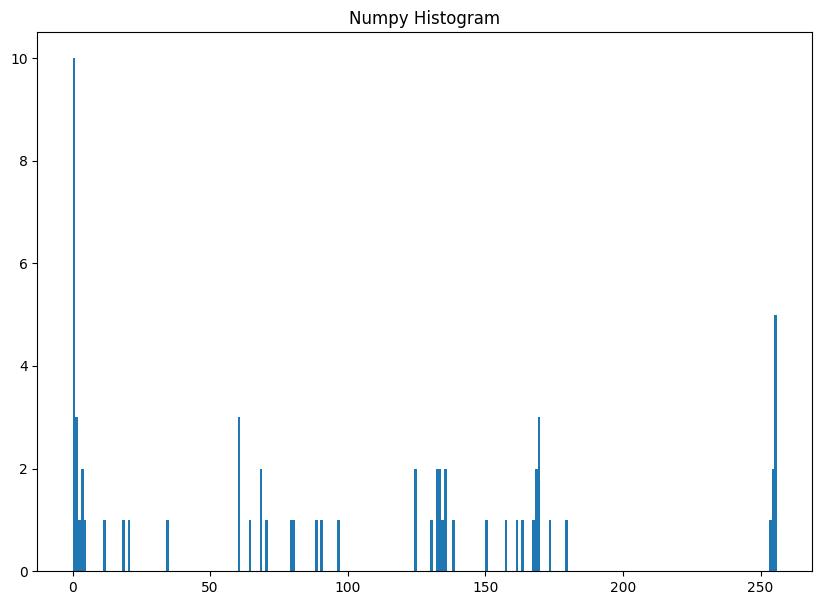

In [22]:
# print(img.shape)
# print(img)

img1d = img.ravel()
# print(img1d.shape)
# print(img1d)

val, freq = np.unique(img1d, return_counts=True)
# print(val.shape)
# print(freq.shape)
# print(val)
# print(freq)

bins = np.arange(0, 257)
# print(bins)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.hist(img1d, bins)
plt.title("Numpy Histogram")
# plt.xticks(np.arange(min(bins), max(bins)+1, 1.0))
# plt.yticks(np.arange(min(freq), max(freq)+1, 1.0))
plt.show()

### **Segmentasi**

####  **Pixel based**



##### Basic Global Thresholding

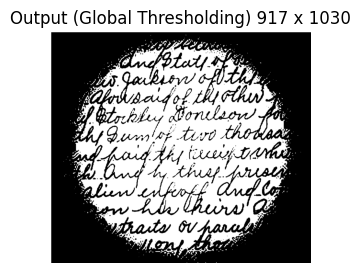

In [5]:
T1 =np.floor(np.mean(img1d))#Nilai Threshold
T2 = T1
T3 = 0
sorted = np.sort(img1d)
output = np.zeros_like(img)

while (T3-T1 != 0):
  first = sorted[sorted <= T2]
  second = sorted[sorted > T2]
  T1 = T2
  # print(first)
  # print(second)
  # print(np.floor(np.mean(first)))
  # print(np.floor(np.mean(second)))

  m1 = np.floor(np.mean(first))
  m2 = np.floor(np.mean(second))
  T3 = (m1+m2)/2
  # print(T1)
  # print(T3)
  # print(T3-T1)
  T2 = T3

T3 = np.floor(T3)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i,j] > T3:
      output[i,j] = 255
    else:
      output[i,j] = 0

#Plot
plt.figure(figsize=(10,3))
plt.imshow(output, cmap='gray')
plt.title(f"Output (Global Thresholding) {img.shape[0]} x {img.shape[1]}")
plt.axis("off")
plt.show()

##### Otsu Method

In [33]:

img1d = img.ravel()
sorted = np.sort(img1d)
val, freq = np.unique(sorted, return_counts=True)
print(val)
print(freq)
print(len(val))
print(len(freq))
var_w = np.zeros(len(val))

i=0

weight_b = np.sum(freq[0:i])/np.sum(freq)
mean_b = np.sum(val[0:i]*freq[0:i])/np.sum(freq[0:i])
var_b = np.sum(((val[0:i]-mean_b)**2)*freq[0:i])/np.sum(freq[0:i])

print(weight_b)
print(mean_b)
print(var_b)

weight_f = np.sum(freq[i:])/np.sum(freq)
mean_f = np.sum(val[i:]*freq[i:])/np.sum(freq[i:])
var_f = np.sum(((val[i:]-mean_f)**2)*freq[i:])/np.sum(freq[i:])

print(weight_f)
print(mean_f)
print(var_f)


var_w[i] = weight_b*var_b + weight_f*var_f
print(var_w)

[  0   1   2   3   4  11  18  20  34  60  64  68  70  79  80  88  90  96
 124 130 132 133 134 135 138 150 157 161 163 167 168 169 173 179 253 254
 255]
[10  3  1  2  1  1  1  1  1  3  1  2  1  1  1  1  1  1  2  1  2  2  1  2
  1  1  1  1  1  1  2  3  1  1  1  2  5]
37
37
10
0
0.0
nan
nan
1.0
100.9375
7153.96484375
[nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]


/tmp/ipython-input-2484560968.py:15: RuntimeWarning: invalid value encountered in scalar divide
  mean_b = np.sum(val[0:i]*freq[0:i])/np.sum(freq[0:i])
/tmp/ipython-input-2484560968.py:16: RuntimeWarning: invalid value encountered in scalar divide
  var_b = np.sum(((val[0:i]-mean_b)**2)*freq[0:i])/np.sum(freq[0:i])


In [38]:
img1d = img.ravel()
sorted = np.sort(img1d)
val, freq = np.unique(sorted, return_counts=True)
print(val)
print(freq)

# val_freq = np.stack((val,freq), axis=1)
# print(val_freq)

var_w = np.zeros(len(val))

for i in range(len(val)):
  # print(i)
  weight_b = np.sum(freq[0:i])/np.sum(freq)
  mean_b = np.sum(val[0:i]*freq[0:i])/np.sum(freq[0:i])
  var_b = np.sum(((val[0:i]-mean_b)**2)*freq[0:i])/np.sum(freq[0:i])

  weight_f = np.sum(freq[i:])/np.sum(freq)
  mean_f = np.sum(val[i:]*freq[i:])/np.sum(freq[i:])
  var_f = np.sum(((val[i:]-mean_f)**2)*freq[i:])/np.sum(freq[i:])

  var_w[i] = weight_b*var_b + weight_f*var_f

print(var_w.shape)
print(var_w)

mask = (var_w != 0) & ~np.isnan(var_w)
min_idx = np.nanargmin(np.where(mask, var_w, np.nan))
min_val = var_w[min_idx]

print(min_idx, min_val)

# bins = np.arange(0, 257)

# # Creating plot
# fig = plt.figure(figsize =(10, 7))
# plt.hist(sorted, bins)
# plt.title("Numpy Histogram")
# plt.show()

[  0   1   2   3   4  11  18  20  34  60  64  68  70  79  80  88  90  96
 124 130 132 133 134 135 138 150 157 161 163 167 168 169 173 179 253 254
 255]
[10  3  1  2  1  1  1  1  1  3  1  2  1  1  1  1  1  1  2  1  2  2  1  2
  1  1  1  1  1  1  2  3  1  1  1  2  5]
[          nan 5267.22800926 4568.78850867 4321.37053571 3803.94401042
 3532.95310544 3280.49471618 3047.32942251 2811.86534091 2627.69646318
 2363.46458333 2273.27810897 2098.49590215 2004.73561508 1941.29239532
 1871.98321078 1828.60047043 1783.82324219 1755.91376466 1924.84953818
 2020.54464286 2198.79339575 2345.57708333 2408.39133749 2512.22788621
 2561.8        2655.4193348  2770.50920894 2893.31950094 3014.52604167
 3143.25140306 3375.23873492 3634.3224537  3705.2667298  3785.1875
 4249.91047932 5142.50264831]
(37,)
18 1755.9137646627569


/tmp/ipython-input-4185284397.py:15: RuntimeWarning: invalid value encountered in scalar divide
  mean_b = np.sum(val[0:i]*freq[0:i])/np.sum(freq[0:i])
/tmp/ipython-input-4185284397.py:16: RuntimeWarning: invalid value encountered in scalar divide
  var_b = np.sum(((val[0:i]-mean_b)**2)*freq[0:i])/np.sum(freq[0:i])


##### Adaptive Thresholding

##### Probability Thresholding

####  **Region based**

##### Region Growing

##### Watershed / Flood fill

##### Clustering

#### **Feature based / Detection**

##### Sliding Window

### **Morphological Process**